## <span style="color:green"> Notebook - Olivine Conduction Mechanisms </span>
<span style="color:purple">Sinan Ozaydin, School of Geosciences, The University of Sydney, NSW 2006, Australia <br/> </span>
<span style="color:purple">sinan.ozaydin@protonmail.com</span>

This jupyter notebook calculates selected olivine conductivities to compare the conduction mechanisms. The conduction mechanisms in olivine can be summed up as:

$$\sigma_{tot} = \sigma_{ion} + \sigma_{pol} + \sigma_{p} \qquad \text{(1)}$$ 

All of them are temperature dependent semi-conduction and follow an Arrhenian formalism:

$$\sigma = \sigma_0 exp(-\frac{\Delta H}{RT}) \qquad \text{(2)}$$

where $\sigma_0$ is pre-exponent in (S/m), $\Delta H$ is activation enthalpy in J/mol, R is the gas constant in J/mol.K and T is temperature in Kelvin (K). In ***pide***, the summation of these mechanisms (1) can be summarised in the following default form:

$$\sigma_{tot} = \sigma_0^{ion} exp(-\frac{\Delta H^{ion}}{RT}) + \sigma_0^{pol} exp(-\frac{\Delta H^{pol}}{RT})  + \sigma_0^{p} C_w^r exp(-\frac{\Delta H^{p} + \alpha C_w}{RT}) \qquad \text{(3)}$$

where $C_w$ is water ($OH^{-}$) content in wt %, $r$ is the water exponent, $\alpha$ is water-related enthalpy modifier. Other formalisms such as, the ones that deal with effect of pressure or certain compositional variations are included the software differently, but how to work with them from a user perspective is the same. In this notebook, we will go through these examples and try to plot different olivine conductivity models with their mechanisms.

Firstly, importing the neccesary libraries:

In [1]:
import pide
import numpy as np
import matplotlib.pyplot as plt

Setting up temperature and pressure environment, then listing all the olivine conductivity models.

In [2]:
p_obj = pide.pide() #forming the pide object

#Setting up temperature array ranging from 600 to 2000K at each 5 degrees.
temperature = np.arange(600,2500,5) 
p_obj.set_temperature(temperature)
p_obj.set_pressure(1.0)
list_olivine_models = p_obj.list_mineral_econd_models('ol') #listing all olivine electrical conductivity methods

Electrical conductivity models for the given mineral: ol
0.   Dai2014_DryandWetOlivine_fo2  -----  polaron+proton
1.   Dai2020_WetOlivine_200ppmTi_fo2  -----  polaron+proton
2.   Dai2020_WetOlivine_683ppmTi_fo2  -----  polaron+proton
3.   Fei2020_WetOlivineIonic_Isotropic  -----  ionicWet
4.   Gardes2014_DryandWetOlivine  -----  ionic+polaron+proton
5.   Jones2012_WetOlivine  -----  proton
6.   Liu2021_DryOlivine_NNOBuffer  -----  polaron
7.   Poe2010_DryandWetOlivine  -----  polaron+proton
8.   Wang2006_DryandWetOlivine  -----  polaron+proton
9.   Yoshino2009_DryandWetOlivine  -----  ionic+polaron+proton
10.   Constable2006_dryOlivine_fo2  -----  polaron
11.   Dai2014_DryOlivine_xFe  -----  polaron
12.   Fullea2011_DryOlivine_xFe  -----  polaron
13.   Pommier2018_ShearedDryOlivine  -----  polaron
14.   Xu1998_DryOlivine  -----  polaron
15.   Yoshino2012_DryOlivine_xFe  -----  polaron
16.   Novella2017_HDiffusion  -----  protondiffusion
17.   Sun2019_HDiffusion  -----  protondiffusion


Now let's try to plot different conduction mechanisms and all olivine conductivity model Gardes2014_DryandWetOlivine. The default way of choosing a conductivity model is to set an integer. In this case, it will use all the available conduction mechanisms in that model. If the user wants to use the conduction mechanisms seperately, they have to define a string in this fashion: '4/proton', where proton conduction mechanism of Gardes2014_DryandWetOlivine is chosen.

In [3]:
p_obj.set_mineral_water(ol = 50) #inppm

p_obj.set_mineral_conductivity_choice(ol = '4/proton')
cond_proton = p_obj.calculate_mineral_conductivity(min_idx = 'ol')

p_obj.set_mineral_conductivity_choice(ol = '4/polaron')
cond_polaron = p_obj.calculate_mineral_conductivity(min_idx = 'ol')

p_obj.set_mineral_conductivity_choice(ol = '4/ionic')
cond_ionic = p_obj.calculate_mineral_conductivity(min_idx = 'ol')

p_obj.set_mineral_conductivity_choice(ol = 4)
cond_all = p_obj.calculate_mineral_conductivity(min_idx = 'ol')

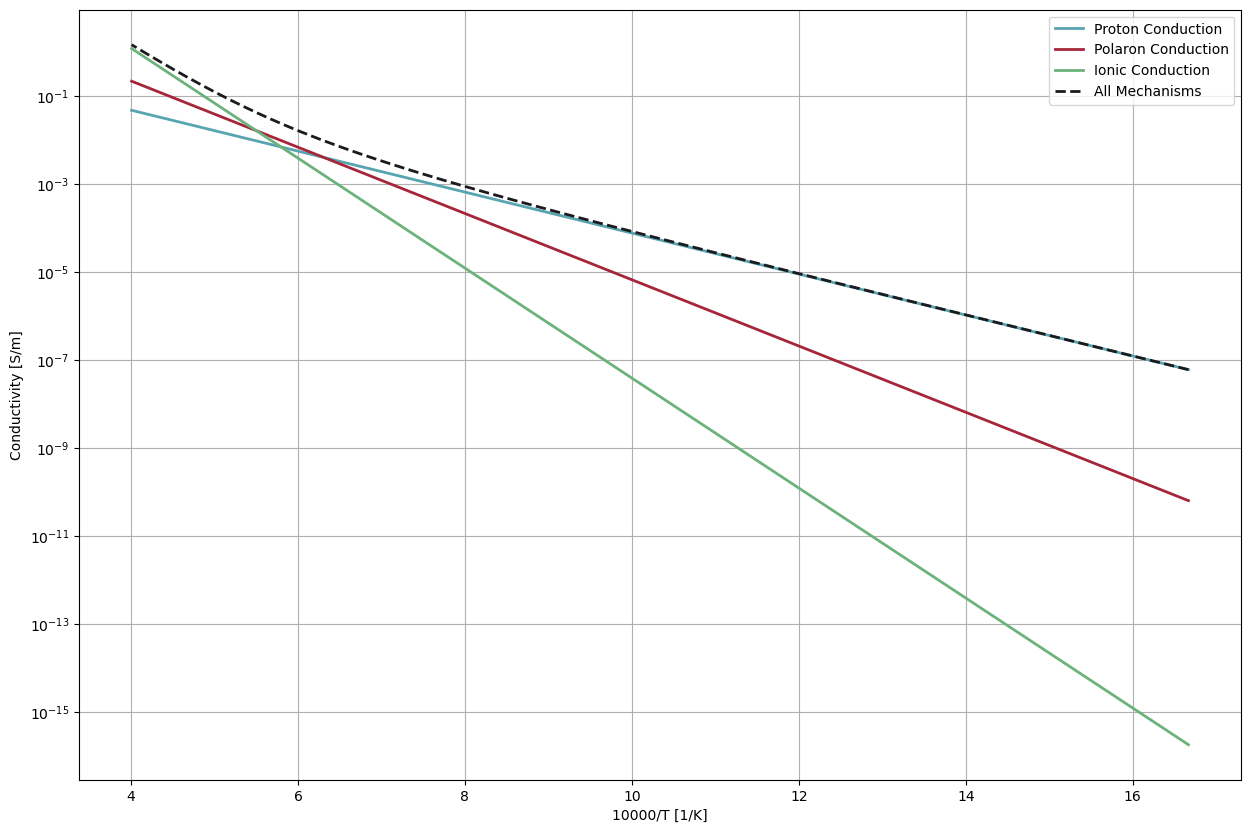

In [4]:
#Plotting the results
figure = plt.figure(figsize = (15,10))
ax = plt.subplot(111)

ax.plot(1e4/temperature, cond_proton, color = '#58A4B0', label = 'Proton Conduction',linewidth = 2)
ax.plot(1e4/temperature, cond_polaron, color = '#A62639', label = 'Polaron Conduction',linewidth = 2)
ax.plot(1e4/temperature, cond_ionic, color = '#6CB27B', label = 'Ionic Conduction',linewidth = 2)
ax.plot(1e4/temperature, cond_all, color = '#1B1B1E', label = 'All Mechanisms', linestyle = '--',linewidth = 2)
ax.set_xlabel('10000/T [1/K]')
ax.set_ylabel('Conductivity [S/m]')

ax.set_yscale('log')
ax.grid(which = 'both')
ax.legend()
plt.show()


Now let's try to mix a dry model "Liu2021_DryOlivine_NNOBuffer" - id:6 with proton conduction of "Dai2014_DryandWetOlivine_fo2" id:'0/proton'. ***pide*** can sum up two different models by identifying them as a list as follows:

In [5]:
p_obj.set_mineral_conductivity_choice(ol = '0/proton')
cond_dai_proton = p_obj.calculate_mineral_conductivity(min_idx = 'ol')

p_obj.set_mineral_conductivity_choice(ol = 6)
cond_liu_dry = p_obj.calculate_mineral_conductivity(min_idx = 'ol')

p_obj.set_mineral_conductivity_choice(ol = [6,'0/proton'])
cond_both = p_obj.calculate_mineral_conductivity(min_idx = 'ol')

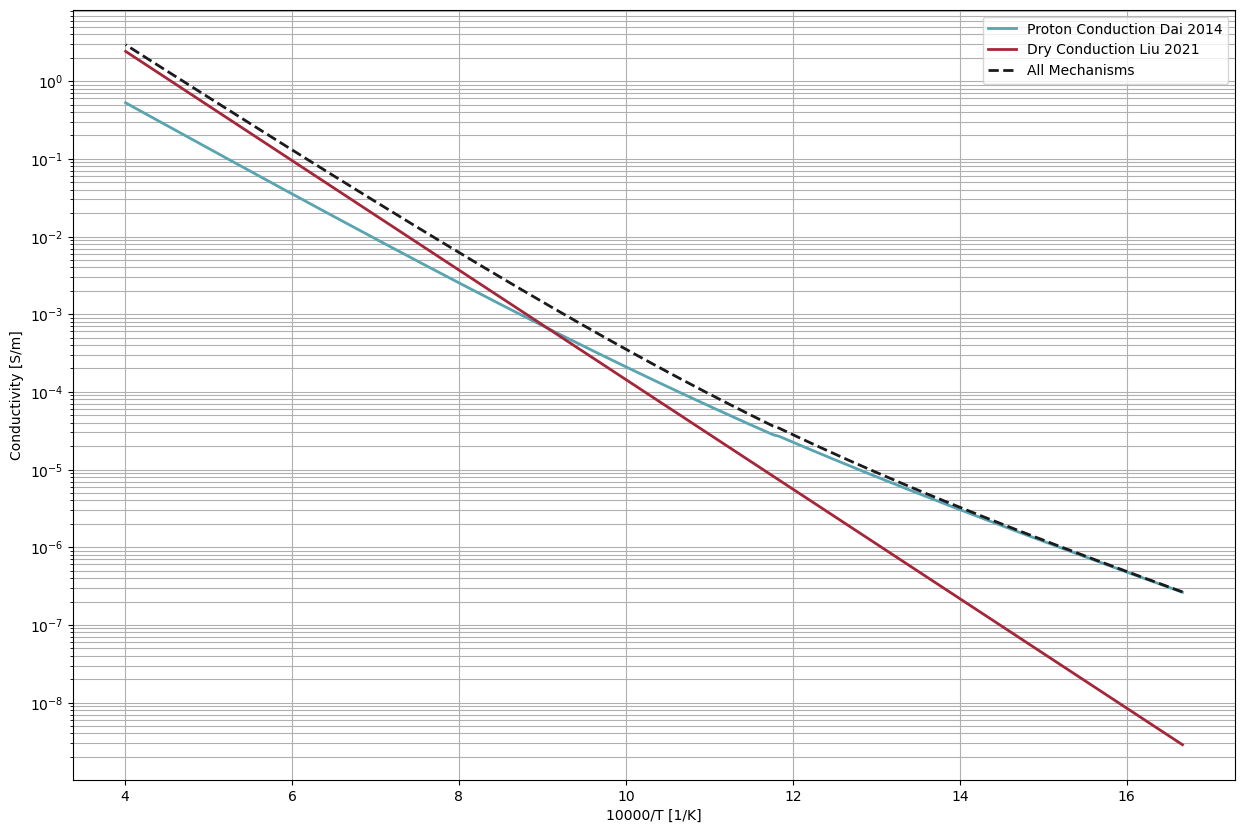

In [6]:
#Plotting the results
figure = plt.figure(figsize = (15,10))
ax = plt.subplot(111)

ax.plot(1e4/temperature, cond_dai_proton, color = '#58A4B0', label = 'Proton Conduction Dai 2014',linewidth = 2)
ax.plot(1e4/temperature, cond_liu_dry, color = '#A62639', label = 'Dry Conduction Liu 2021',linewidth = 2)
ax.plot(1e4/temperature, cond_both, color = '#1B1B1E', label = 'All Mechanisms', linestyle = '--',linewidth = 2)
ax.set_xlabel('10000/T [1/K]')
ax.set_ylabel('Conductivity [S/m]')

ax.set_yscale('log')
ax.grid(which = 'both')
ax.legend()
plt.show()